# The aim of this repo is to find lines, their shape, curvature and position in the real-world.
 - We assume we get the image after undistortion, thresholding gradient, and perspective transform.
 - **Author:** Marcelo Garcia

The pipeline consists of:

* Histogram peaks

In [0]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

## Histogram peaks technique

In [0]:
def hist(img):
    # Grab only the bottom half of the image
    # Lane lines are likely to be mostly vertical nearest to the car
    height, width = np.shape(img)
    bottom_half = img[np.int(height/2):,:]

    # Sum across image pixels vertically - make sure to set `axis`
    # i.e. the highest areas of vertical lines should be larger values
    histogram = np.sum(bottom_half, axis=0) ## *Note 
    return histogram, bottom_half

**\*Note:** Remember that in python matrices Axis 0 is vertical and Axis 1 Horizontal. Please follow this [link](https://www.google.com/search?q=axis+matrix+vertical+python+0+or+1&rlz=1C1GCEV_enUS844US844&sxsrf=ALeKk01cg2AjnFSQHKlmTDxztSHOVL2I7Q:1585166509942&tbm=isch&source=iu&ictx=1&fir=gPcqaRZ_oIIdYM%253A%252Cb-NRbyCLWv1F-M%252C_&vet=1&usg=AI4_-kRnVAMrJh_g1KcceBtAuillQfGCOQ&sa=X&ved=2ahUKEwjDnvC1tbboAhUKQq0KHdYvA5kQ9QEwAHoECAcQAw#imgrc=gPcqaRZ_oIIdYM:) for illustration purposes

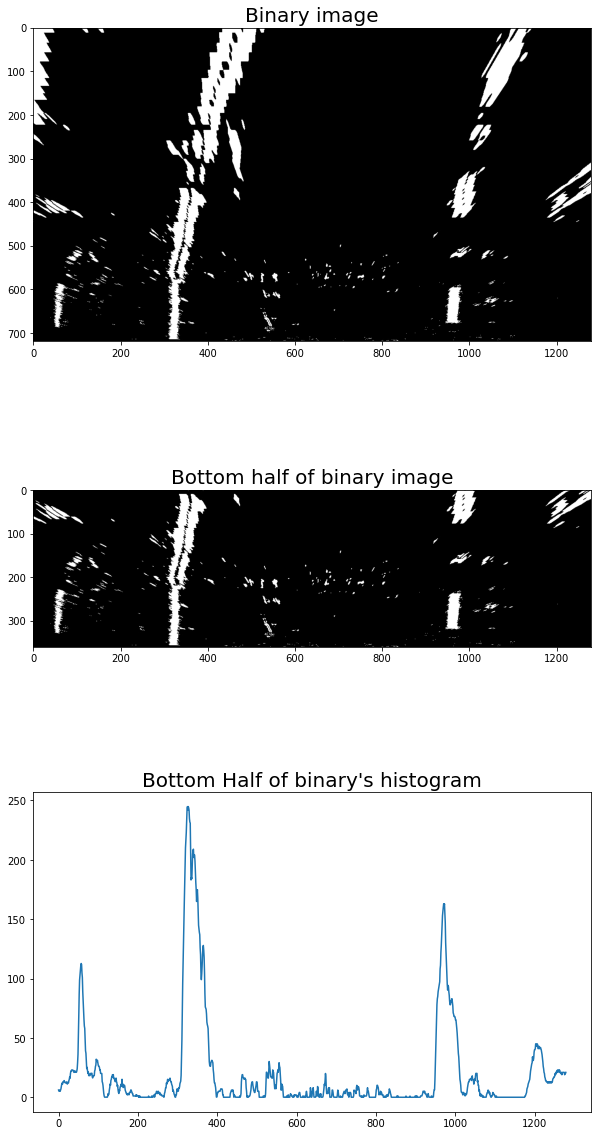

In [95]:
# Load our image
# `mpimg.imread` will load .jpg as 0-255, so normalize back to 0-1
img = mpimg.imread('warped-example.jpg')/255 # remember image is a binary picture after perspective calibration, undistortion, gradient & HSL thersholds, perspective transform

# Create histogram of image binary activations
histogram, bottom_half = hist(img)
# Visualize the resulting histogram
fig, [ax1, ax2, ax3] =plt.subplots(3,1, figsize=(10,20))

ax1.imshow(img, cmap='gray')
ax1.title.set_text('Binary image')
ax1.title.set_fontsize(20)
ax3.plot(histogram)
ax3.title.set_text('Bottom Half of binary\'s histogram')
ax3.title.set_fontsize(20)
ax2.imshow(bottom_half, cmap='gray')
ax2.title.set_text('Bottom half of binary image')
ax2.title.set_fontsize(20)
plt.show()

**Conclusion:** From the illustrations above you can tell that in fact the histogram peaks are most likely at the lane lines. Therefore, this is a good and easy way way to find the x position of the starting points of the lane lines